# Projct 6
## Wrangle and Analyze Data

### By Areej Alzahrani



## Introduction

#### This project is about data wrangling. The goal is to (fill) Only tweets before August 1st, 2017 will be considered in this project since beyond that data we don't have results from the prediction ALgorithm. requirements:
1. Gathering:
    original ratings that have images
1. Asessing and Cleaning:
    Min 8 quality issues,
    2 tidiness issues


In [1]:
# import needed libraries
import pandas as pd
import requests as req
import matplotlib as plt

% matplotlib inline

### Gathering
Will gather three data files. 
1. WeRateDogs, Twitter archive (This file is available at hand from the supporting materials) 
2. get the predictions data (Will use the Request library to send HTTP request and get HTTP response. After that, write the response text to a file named with the last part in the url). 
3. tweet-json.txt (unfortunately I couldn't get access to Twitter API so I will use the data file in the supporting materials)

In [2]:
# 1. WeRateDogs Twitter archive
## This file is available at hand from the supporting materials
pd.set_option('display.max_colwidth', -1)
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
# 2. get the predictions data
## Will use the Request library to send HTTP request
## and get HTTP response. After that, write the response
## text to a file named with the last part in the url.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = req.get(url)
with open(url.split('/')[-1],'w') as file:
    file.write(response.text) 

# Testing the result and printing few lines
df_pred = pd.read_csv('image-predictions.tsv','\t')
df_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [4]:
# 3. tweet-json.txt
## unfortunately I couldn't get access to Twitter API
## so I will use the data file in the supporting materials
import json

# tweet-json.txt file contains multiple records and json.loads()
# is not able to decode more than one. So, first I will read line
# by line and decode each record seperately.
tweets = []
with open('tweet-json.txt') as tweet_lines:
    json_data = tweet_lines.readlines()
    for json_line in json_data:
        tweet = json.loads(json_line)
        tid = tweet['id']
        rt = tweet['retweet_count']
        fav = tweet['favorite_count']
        tweets.append([tid,rt,fav])

In [5]:
# Here I created a dataframe from the tweets list
df_tweet = pd.DataFrame()
df_tweet = df_tweet.append(tweets).rename(columns={0:'tweet_id', 1:'retweets', 2:'favorites'})
df_tweet.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing
Assessing each gathered dataframe visually and programmatically for quality and tidiness issues. I will assess each dataframe separately and document the detected issues. Later, in the assessing summary section I will document eight quality issues and two tidiness issues which will be cleansed in the Cleaning section.

### Archived Tweets Data:
This data set has many quality issues. All quality issues in this project found in this data. More than 8 issues are addressed.

In [6]:
# After going through the observation in df_arch, and
# from the results below we conclude:

# 1 Missing data at columns: in_reply_to_status_id,
# in_reply_to_user_id, 
# retweeted_status_id, 
# retweeted_status_user_id,
# retweeted_status_timestamp

print(df_arch.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# 2. Inaccurate data in Name column since some names are: the, a, an
# which it is not correct.

# view the different names
print(df_arch.name.value_counts())

# checking the text of the "by" and "a" names.
df_arch.query('name == "by" or name == "a"').head()

None          745
a             55 
Charlie       12 
Oliver        11 
Cooper        11 
Lucy          11 
Tucker        10 
Lola          10 
Penny         10 
Winston       9  
Bo            9  
the           8  
Sadie         8  
Toby          7  
Daisy         7  
Bailey        7  
an            7  
Buddy         7  
Jax           6  
Rusty         6  
Leo           6  
Milo          6  
Dave          6  
Stanley       6  
Koda          6  
Bella         6  
Jack          6  
Scout         6  
Oscar         6  
Oakley        5  
             ..  
Chesterson    1  
Murphy        1  
Jessiga       1  
Gin           1  
Willie        1  
Steve         1  
Strider       1  
Florence      1  
Berb          1  
Taz           1  
Kara          1  
Blu           1  
Stuart        1  
Kendall       1  
Saydee        1  
Tedders       1  
Spark         1  
Spencer       1  
Gustav        1  
Tug           1  
Yukon         1  
Georgie       1  
Lacy          1  
Hazel         1  
General   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None


In [8]:
# 3. Hard to analyse data at columns doggo, flooper, pupper, and puppo
# these columns should be squeezed into one column.
print(df_arch.doggo.value_counts())
print(df_arch.floofer.value_counts())
print(df_arch.pupper.value_counts())
print(df_arch.puppo.value_counts())

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


In [9]:
# 4. undescriptive columns names
## in_reply_to_status_id	in_reply_to_user_id	source	retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp	expanded_urls	doggo	floofer	pupper	puppo

In [10]:
# 5. Inaccurate data
# The ratings are not always correct As you can see 

# The correct rating is 9/10 but it is extracted wrongly.
print(df_arch.iloc[2335][['text','rating_numerator','rating_denominator']])

# Also, all denominators should be 10
df_arch.rating_denominator.value_counts()

text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator      1                                                                                                                                       
rating_denominator    2                                                                                                                                       
Name: 2335, dtype: object


10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [11]:
# 6. Inconsistent data
# the source column has different format to represent
# urls. this column should be formattted like the expanded_urls

In [12]:
# 7. The source column should be categorized
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [13]:
# 8. Wrong data types for in_reply_to_status_id, in_reply_to_user_id, timestamp,
# retweeted_status_id, retweeted_status_user_id, & retweeted_status_timestamp
df_arch.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [14]:
# 9. Invalid data: during the visually assessing some tweets are invalid
# This tweet is not about dog ratings! It is news
df_arch[df_arch.tweet_id == 832645525019123713]
# There are other invalid tweets:
#832645525019123713 it is a news tweet, to be removed
#832088576586297345 not a dog rating tweet, to be removed
#810984652412424192 this dog has no rating, to be removed
#686035780142297088 to be removed
#684222868335505415 overwrited by 684225744407494656, to be removed
#682808988178739200 not dog rating tweet, to be removed
#746906459439529985 not dog rating tweet, to be removed
#835152434251116546 to be removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None


In [15]:
# 10. There are not original ratings (retweets)
df_arch[df_arch.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

### Photo Predections Data & Tweets-json Data:
df_pred and df_tweet have no quality issues but rather they lack tidiness.

In [16]:
# One tidiness issue is that each type of observational unit should forms a table
# So, each prediction should form a seperate table.
# one table for the first prediction columns, another 
# for the second prediction columns, ans same for the 
# thied prediction column.
df_pred.info()
print(df_pred.describe())
print(df_pred.dtypes)
df_pred.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17  1.203855     0.594548     1.345886e-01  6.032417e-02
std    6.785203e+16  0.561875     0.271174     1.006657e-01  5.090593e-02
min    6.660209e+17  1.000000     0.044333     1.011300e-08  1.740170e-10
25%    6.764835e+17  1.000000     0.364412     5.388625e-02

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
# One tidiness issue is that this dataframe
# should be merged with the data in df_arch 
# to be more meaningful together.
df_tweet.info()
print(df_tweet.dtypes)
df_tweet.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB
tweet_id     int64
retweets     int64
favorites    int64
dtype: object


,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Assessing Summary:
#### Quality:
1.	Inaccurate names in name column at archived tweets data.
2.	Inaccurate ratings at archived tweets data.
3.	Source column should be categorized into 4 categories.
4.	In df_arch columns: 'retweeted_status_user_id','retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'expanded_urls' are not valuable or meaningful
5.	In df_arch columns: timestamp should be of type datetime
6.	There are not original ratings (retweets) 
7.	Invalid data: during the visually assessing some tweets are invalid. Like they are news or ratings for non-dogs.
8.	in_reply_to_status_id column name is not clear and should store info about weather the tweet is a reply or not.
#### Tidiness:
1.	Merge the retweets and favorites columns to the tweet archive table, joining on given tweet_id.
2.	Replace doggo floofer pupper puppo columns with one column called stage.


### Cleaning
Cleaning includes merging individual pieces of data according to the rules of tidy data.

In [18]:
# first copy all dataframes
df_arch_clean = df_arch.copy()
df_pred_clean = df_pred.copy()
df_tweet_clean = df_tweet.copy()

#### Define

#### Quality:
1.	Drop retweeted tweets.
2.	Drop useless columns:
    a.	'retweeted_status_user_id','retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'expanded_urls'
3.	Use in_reply_to_status_id column as indicator if the tweet is a reply. and rename it to is_reply. 1 if true and 0 is false.
4.	Categorize the source column to have values: 'iPhone', 'Vine', 'Web', and 'TweetDeck'
5.	Extract the correct name if exist. I noticed that names that start with small letters are not correct. So, will use patterns to extract to the correct names or will handle them manually. name patterns encountered: 'named (REAL_NAME). ' and 'name is (REAL_NAME). '
6.	Remove the invalid tweets. tweets that are not about dog ratings or with overwrited rating.
    #832645525019123713 it is a news tweet, to be removed
    #832088576586297345 not a dog rating tweet, to be removed
    #810984652412424192 this dog has no rating, to be removed
    #686035780142297088 to be removed
    #684222868335505415 overwrited by 684225744407494656, to be removed
    #682808988178739200 not dog rating tweet, to be removed
    #746906459439529985 not dog rating tweet, to be removed
    #835152434251116546 to be removed
7.	Extract the correct rating. Based on rating_denominators not equal to 10 we have two issues to be taking care of: 
    a.	Having two fractions at the same tweet or decimal value  in the numerator led to incorrect ratings ==> so will re-extract the rating using faindall lambda.  The regular expression will return last fraction in the text which is the correct rating. Also, will take care if the numerator is a decimal value.
    b.	Multiple dogs ratings: the tweet is for multiple dogs so the rating  is multiplied by number of dogs ==> divide the rating, add column # of dogs
8.	In df_arch column timestamp should be of type datetime.

#### Tidiness:
1.	Merge the retweets and favorites columns to the tweet archive table, joining on given tweet_id.
2.	Move the first prediction to the tweet arch table.
3.	Move the text column from tweet archive table to the prediction table.
4.	Replace doggo floofer pupper puppo columns with one column called stage.


#### Code

In [19]:
# 1. Drop retweeted tweets
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_id.isnull()]

#### Test

In [20]:
# T1. retweeted_status_id should be 0 non-null
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Code

In [21]:
# 2. Drop useless columns
df_arch_clean = df_arch_clean.drop(['retweeted_status_user_id','retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'expanded_urls'], axis=1)

#### Test

In [22]:
# T2. Check the new columns
df_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Code

In [23]:
# 3. Use in_reply_to_status_id column as indicator if the tweet is a reply.
# and rename it to is_reply. 1 if true and 0 is false.
df_arch_clean['in_reply_to_status_id'] = (df_arch_clean['in_reply_to_status_id'] > 0).astype(int)
df_arch_clean.rename(columns={'in_reply_to_status_id':'is_reply'}, inplace=True)

#### Test

In [24]:
# T3. Check the new name and the values
print('in_reply_to_status_id' in df_arch_clean.columns)
df_arch_clean.is_reply.value_counts()

False


0    2097
1    78  
Name: is_reply, dtype: int64

#### Code

In [25]:
# 4. Categorize the source column to have values:
#   'iPhone', 'Vine', 'Web', 'TweetDeck'
sources = df_arch_clean.source.value_counts().keys()
new_srs = ['iPhone', 'Vine', 'Web', 'TweetDeck']
for i in range(len(new_srs)):
    df_arch_clean.source.replace(sources[i], new_srs[i], inplace=True)

#### Test

In [26]:
# T4. Check the new values of the source column
df_arch_clean.source.value_counts()

iPhone       2042
Vine         91  
Web          31  
TweetDeck    11  
Name: source, dtype: int64

#### Code

In [27]:
# 5. Extract the correct name if exist. I noticed that names that start with 
# small letters are not correct. So, will use patterns to extract to the correct 
# names or will handle them manually..
# name patterns encountered:
# 'named (REAL_NAME). '
# 'name is (REAL_NAME). '

# get all the unique names
names = df_arch_clean.name.value_counts().keys()
# a list to store wrong names (which start with small letter)
wrong_names = []
for name in names:
    if(name[0].isupper() == False):
        wrong_names.append(name)

# add None to the wrong names list to ensure that names are correct
wrong_names.append('None')

In [28]:
# 5.a Use re library to extract the names form the patterns"
import re

# exttract names using first pattern (p1). The "\d+" part in regex is only to take care
# of tweets that dont match the pattern
df_arch_clean.loc[df_arch_clean['name'].isin(wrong_names),'name']= df_arch_clean.loc[df_arch_clean['name'].isin(wrong_names),'text'].apply(lambda x: re.search(r'named (.*?). |\d+', x).group(1))

# exttract names using first pattern (p2). The "\d+" part in regex is only to take care
# of tweets that dont match the pattern
# after applying the first pattern, tweets don't match will have null aas a name :) 
df_arch_clean.loc[df_arch_clean['name'].isnull(),'name']= df_arch_clean.loc[df_arch_clean['name'].isnull(),'text'].apply(lambda x: re.search(r'name is (.*?). |\d+', x).group(1))

In [29]:
# 5.b Manually handling for these tweets:
"""
tweet_id           Real_name
886267009285017600 Tanner
885518971528720385 Howard
885167619883638784 Pawbably
878604707211726852 Martha 
872668790621863937 Penelope 
863079547188785154 Pablo
861288531465048066 BOOMER
856526610513747968 CHARLIE

"""
tweet_ids = [886267009285017600,
885167619883638784,
878604707211726852, 
872668790621863937, 
863079547188785154,
861288531465048066,
856526610513747968]
names = ['Tanner',
         'Pawbably',
         'Martha',
         'Penelope',
         'Pablo',
         'BOOMER',
         'CHARLIE']

for tweet_id in tweet_ids:
    df_arch_clean.loc[df_arch_clean['tweet_id']==tweet_id,'name'] = names[tweet_ids.index(tweet_id)]


#### Test

In [30]:
# T5.a Test that there is no wrong names
print(df_arch_clean[df_arch_clean['name'].isin(wrong_names)].shape[0])
df_arch_clean.name.value_counts()

0


Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny         9 
Tucker        9 
Lola          8 
Winston       8 
Sadie         8 
Daisy         7 
Toby          7 
Bella         6 
Jax           6 
Koda          6 
Bo            6 
Bailey        6 
Oscar         6 
Stanley       6 
Scout         5 
Milo          5 
Rusty         5 
Bentley       5 
Leo           5 
Chester       5 
Buddy         5 
Dave          5 
Louis         5 
Duke          4 
Sophie        4 
Gary          4 
             .. 
Jebberson     1 
Bruno         1 
Longfellow    1 
Comet         1 
Georgie       1 
Yukon         1 
Jomathan      1 
Gustav        1 
Mollie        1 
Bonaparte     1 
Rudy          1 
Aqua          1 
Jarvis        1 
Lolo          1 
Walker        1 
Florence      1 
Taz           1 
Wylie         1 
Kara          1 
Blu           1 
Stuart        1 
Canela        1 
Meyer         1 
Kendall       1 
Saydee        1 
Tedders       1 
Spark         1 
Spencer       

In [31]:
# T5.b Check the names of the manually extracted tweets
df_arch_clean[df_arch_clean.tweet_id.isin(tweet_ids)]

,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,1,2017-07-15 16:51:35 +0000,iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,12,10,Tanner,None,None,None,None
37,885167619883638784,0,2017-07-12 16:03:00 +0000,iPhone,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,13,10,Pawbably,None,None,None,None
72,878604707211726852,0,2017-06-24 13:24:20 +0000,iPhone,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,13,10,Martha,None,None,None,None
149,863079547188785154,1,2017-05-12 17:12:53 +0000,iPhone,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",14,10,Pablo,None,None,None,None
157,861288531465048066,0,2017-05-07 18:36:02 +0000,iPhone,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,13,10,BOOMER,None,None,None,None
184,856526610513747968,1,2017-04-24 15:13:52 +0000,iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",14,10,CHARLIE,None,None,None,None


#### Code

In [32]:
# 6. remove the invalid tweets
## tweets that are not about dog ratings or with overwrited rating
#832645525019123713 it is a news tweet, to be removed
#832088576586297345 not a dog rating tweet, to be removed
#810984652412424192 this dog has no rating, to be removed
#686035780142297088 to be removed
#684222868335505415 overwrited by 684225744407494656, to be removed
#682808988178739200 not dog rating tweet, to be removed
#746906459439529985 not dog rating tweet, to be removed
#835152434251116546 to be removed

# the tweet_id list of the invalid tweets
invalid_tweets = [832645525019123713,
                  832088576586297345,
                  810984652412424192,
                  686035780142297088,
                  684222868335505415,
                  682808988178739200,
                  746906459439529985,
                  835152434251116546]
# loop through the invalid tweets and drop them
for tweet in invalid_tweets:
    df_arch_clean = df_arch_clean.drop(df_arch_clean.loc[df_arch_clean.tweet_id == tweet].index[0], axis=0)

#### Test

In [33]:
# T6. Ensuring that the terminal news tweet is dropped
df_arch_clean[df_arch_clean.tweet_id.isin(invalid_tweets)]

,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Code

In [34]:
# 7. Extract the correct rating 
## Based on rating_denominators not equal to 10
## we have two issues to be taking care of:
# 7.a. Having two fractions at the same tweet or decimal value 
#      in the numerator led to incorrect ratings
#      ==> so will re-extract the rating using faindall lambda. 
#      The regular expression will return last fraction in the
#      text which is the correct rating. Also, will take care if 
#      the numerator is a decimal value.
# 7.b. Multiple dogs ratings: the tweet is for multiple dogs so the rating 
#      is multiplied by number of dogs ==> divide the rating, add column # of dogs
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# 7.a. Having two fractions at the same tweet or decimal value in the numerator led to incorrect ratings
## ==> so will re-extract the rating using faindall lambda. The regular expression will return last
## fraction in the text which is the correct rating. Also, will take care if the numerator is 
## a decimal value.
df_arch_clean['rating_numerator'] = df_arch_clean['text'].apply(lambda x: float(re.findall(r'([\d+]*?[-+.]?\d+/[-+]?\d+)', x)[-1].split('/')[0]))
df_arch_clean['rating_denominator'] = df_arch_clean['text'].apply(lambda x: int(re.findall(r'([\d+]*?[-+.]?\d+/[-+]?\d+)', x)[-1].split('/')[1]))



In [35]:
# 7.b. Multiple dogs ratings:
##creating a column to store how many dogs rated in this tweet
## after visually assessing these records have more than one rated dog:
#758467244762497024 15 dogs
#820690176645140481 7 dogs
#731156023742988288 17 dogs
#713900603437621249 9 dogs
#709198395643068416 5 dogs
#704054845121142784 4 dogs
#684225744407494656 13 dogs
#677716515794329600 12 dogs
#675853064436391936 8 dogs
#716439118184652801 5 dogs
#710658690886586372 8 dogs
#697463031882764288 4 dogs

df_arch_clean['dogs_number'] = 1
## creating a list of the invalid ratings tweets ids
invalid_tweets = [758467244762497024,
                 820690176645140481,
                 731156023742988288,
                 713900603437621249,
                 709198395643068416,
                 704054845121142784,
                 684225744407494656,
                 677716515794329600,
                 675853064436391936,
                 716439118184652801,
                 710658690886586372,
                 697463031882764288]

for tweet_id in invalid_tweets:
    record = df_arch_clean.query('tweet_id == @tweet_id')
    dogs_num = int(record.rating_denominator/10)
    df_arch_clean.loc[df_arch_clean['tweet_id']==tweet_id,'dogs_number'] = int(dogs_num)
    df_arch_clean.loc[df_arch_clean['tweet_id']==tweet_id,'rating_numerator'] = int(record.rating_numerator/dogs_num)
    df_arch_clean.loc[df_arch_clean['tweet_id']==tweet_id,'rating_denominator'] = int(record.rating_denominator/dogs_num)

#### Test

In [36]:
# t7.a. Check the if there are invalid ratings 
print(df_arch_clean.rating_numerator.value_counts())
df_arch_clean.loc[df_arch_clean.rating_denominator !=10]

12.00      502
11.00      427
10.00      426
13.00      310
9.00       153
8.00       100
7.00       55 
14.00      44 
6.00       33 
5.00       33 
3.00       19 
4.00       16 
2.00       10 
0.10       9  
1.00       8  
0.11       4  
0.90       3  
420.00     2  
0.12       2  
1776.00    1  
9.75       1  
13.50      1  
666.00     1  
9.50       1  
15.00      1  
11.27      1  
0.13       1  
11.26      1  
182.00     1  
0.80       1  
Name: rating_numerator, dtype: int64


,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_number


In [37]:
# T7.b. check the rating and dogs_num column
df_arch_clean[df_arch_clean.tweet_id.isin(invalid_tweets)]

,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_number
433,820690176645140481,0,2017-01-15 17:52:40 +0000,iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,10,None,None,None,None,None,7
902,758467244762497024,0,2016-07-28 01:00:57 +0000,iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11.0,10,None,None,None,None,None,15
1120,731156023742988288,0,2016-05-13 16:15:54 +0000,iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12.0,10,None,None,None,None,None,17
1202,716439118184652801,0,2016-04-03 01:36:11 +0000,iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10,Bluebert,None,None,None,None,1
1228,713900603437621249,0,2016-03-27 01:29:02 +0000,iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.0,10,None,None,None,None,None,9
1254,710658690886586372,0,2016-03-18 02:46:49 +0000,iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10.0,10,None,None,None,None,None,8
1274,709198395643068416,0,2016-03-14 02:04:08 +0000,iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9.0,10,None,None,None,None,None,5
1351,704054845121142784,0,2016-02-28 21:25:30 +0000,iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12.0,10,None,None,None,None,None,5
1433,697463031882764288,0,2016-02-10 16:51:59 +0000,iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,11.0,10,None,None,None,None,None,4
1634,684225744407494656,1,2016-01-05 04:11:44 +0000,iPhone,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",11.0,10,None,None,None,None,None,13


#### Code

In [38]:
# 8. In df_arch column timestamp should be of type datetime
df_arch_clean.timestamp = pd.to_datetime(df_arch_clean.timestamp)

#### Test

In [39]:
df_arch_clean.dtypes

tweet_id              int64         
is_reply              int64         
timestamp             datetime64[ns]
source                object        
text                  object        
rating_numerator      float64       
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dogs_number           int64         
dtype: object

## Tidiness

#### Code

In [40]:
# 1. Merge the retweets and favorites columns to the tweet archive table, joining on given tweet_id.
df_arch_clean = pd.merge(df_arch_clean, df_tweet_clean, on='tweet_id', how='left')

#### Test

In [41]:
# Check the mege is succeded 
df_arch_clean.head()

,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_number,retweets,favorites
0,892420643555336193,0,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None,1,8853,39467
1,892177421306343426,0,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,None,None,None,1,6514,33819
2,891815181378084864,0,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,None,None,None,1,4328,25461
3,891689557279858688,0,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,None,None,None,None,1,8964,42908
4,891327558926688256,0,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None,None,None,None,1,9774,41048


#### Code

In [42]:
# 2. Move the first prediction to the tweet arch table
df_arch_clean['p1'] = df_pred_clean['p1']
df_arch_clean['p1_conf'] = df_pred_clean['p1_conf']
df_arch_clean['p1_dog'] = df_pred_clean['p1_dog']

df_pred_clean = df_pred_clean.drop('p1',axis=1)
df_pred_clean = df_pred_clean.drop('p1_conf', axis=1)
df_pred_clean = df_pred_clean.drop('p1_dog', axis=1)

#### Test

In [43]:
# Check the first prediction is added to the twitter arch.
df_arch_clean.head(1)

,tweet_id,is_reply,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_number,retweets,favorites,p1,p1_conf,p1_dog
0,892420643555336193,0,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None,1,8853,39467,Welsh_springer_spaniel,0.465074,True


In [44]:
# Check the first prediction is removed from the prediction table.
df_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Code

In [45]:
# 3. Move the text column from tweet archive table to the prediction table
df_pred_clean['text'] = df_arch_clean['text']

df_arch_clean = df_arch_clean.drop('text',axis=1)

#### Test

In [46]:
# Check text column is added to the prediction table.
df_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie,0.156665,True,Shetland_sheepdog,0.061428,True,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [47]:
# Check text column is removed from the twitter arch. table.
df_arch_clean.head(1)

,tweet_id,is_reply,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_number,retweets,favorites,p1,p1_conf,p1_dog
0,892420643555336193,0,2017-08-01 16:23:56,iPhone,13.0,10,Phineas,None,None,None,None,1,8853,39467,Welsh_springer_spaniel,0.465074,True


#### Code

In [48]:
# 4. Replace doggo floofer pupper puppo columns with one column called stage
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    df_arch_clean.loc[df_arch_clean[stage] == stage, 'stage'] = df_arch_clean.loc[df_arch_clean[stage] == stage, stage]
    df_arch_clean = df_arch_clean.drop(stage,axis=1)

    

#### Test

In [49]:
df_arch_clean.head(50)

,tweet_id,is_reply,timestamp,source,rating_numerator,rating_denominator,name,dogs_number,retweets,favorites,p1,p1_conf,p1_dog,stage
0,892420643555336193,0,2017-08-01 16:23:56,iPhone,13.0,10,Phineas,1,8853,39467,Welsh_springer_spaniel,0.465074,True,NaN
1,892177421306343426,0,2017-08-01 00:17:27,iPhone,13.0,10,Tilly,1,6514,33819,redbone,0.506826,True,NaN
2,891815181378084864,0,2017-07-31 00:18:03,iPhone,12.0,10,Archie,1,4328,25461,German_shepherd,0.596461,True,NaN
3,891689557279858688,0,2017-07-30 15:58:51,iPhone,13.0,10,Darla,1,8964,42908,Rhodesian_ridgeback,0.408143,True,NaN
4,891327558926688256,0,2017-07-29 16:00:24,iPhone,12.0,10,Franklin,1,9774,41048,miniature_pinscher,0.560311,True,NaN
5,891087950875897856,0,2017-07-29 00:08:17,iPhone,13.0,10,None,1,3261,20562,Bernese_mountain_dog,0.651137,True,NaN
6,890971913173991426,0,2017-07-28 16:27:12,iPhone,13.0,10,Jax,1,2158,12041,box_turtle,0.933012,False,NaN
7,890729181411237888,0,2017-07-28 00:22:40,iPhone,13.0,10,None,1,16716,56848,chow,0.692517,True,NaN
8,890609185150312448,0,2017-07-27 16:25:51,iPhone,13.0,10,Zoey,1,4429,28226,shopping_cart,0.962465,False,NaN
9,890240255349198849,0,2017-07-26 15:59:51,iPhone,14.0,10,Cassie,1,7711,32467,miniature_poodle,0.201493,True,doggo


### Storing
Will store two csv files. The first one “twitter_archive_master.csv”  is to hold major columns and important for analysis. The second “tweet_details_master.csv” will have detailed info like the 2nd, 3rd, and tweet text info.

In [50]:
# storing data
df_arch_clean.to_csv('twitter_archive_master.csv', index=False)
df_pred_clean.to_csv('tweet_details_master.csv', index=False)

### Analyzing
There are few questions I would like to answer regarding this data:
1. Is the tweet source related to high rating?
2. Does high retweets mean high rating?
3. What is the relation between the first prediction and having dog info i.e., the dog name, stage is not null?

In [51]:
# reading the data
archive_master = pd.read_csv('twitter_archive_master.csv')
details_master = pd.read_csv('tweet_details_master.csv')

In [52]:
# 1. Is the tweet source related to high rating?
###  The relationship between the source and rating is 
###  tweets from TweetDeck have the highest rating mean
###  Vine and Web sources tend to have lower ratings
###  while tweets from iphone are average.

archive_master.groupby('source').describe()['rating_numerator']

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
TweetDeck,11.0,171.545455,532.138584,9.00,10.50,11.0,12.0,1776.0
Vine,91.0,11.254176,1.844746,0.13,11.00,12.0,12.0,14.0
Web,30.0,10.066667,2.911728,1.00,8.25,11.0,12.0,14.0
iPhone,2035.0,11.315656,19.893298,0.10,10.00,11.0,12.0,666.0


In [53]:
# 2. Does high retweets mean high rating?
###  As you can see having high rating is not necessary to lead to more
###  retweets since the group of medium retweets have highest rating avg.

# use 25% 50% and 75% quartiles of retweets column to group the retweets
g25 = 609.5
g50 = 1343
g75 = 3220

low = archive_master.query('retweets < @g25 ').describe()['rating_numerator']
low_high = archive_master.query('(retweets >= @g25) & (retweets<@g50)').describe()['rating_numerator']
meduim = archive_master.query('(retweets >= @g50) & (retweets<@g75)').describe()['rating_numerator']
high = archive_master.query('retweets >= @g75').describe()['rating_numerator']

print('low retweets: '+str(low))
print('low_high retweets: '+str(low_high))
print('meduim retweets: '+str(meduim))
print('high retweets: '+str(high))

low retweets: count    542.000000
mean     10.653321 
std      19.253573 
min      0.100000  
25%      9.000000  
50%      10.000000 
75%      11.000000 
max      420.000000
Name: rating_numerator, dtype: float64
low_high retweets: count    541.000000
mean     11.022421 
std      28.313731 
min      0.100000  
25%      9.000000  
50%      10.000000 
75%      11.000000 
max      666.000000
Name: rating_numerator, dtype: float64
meduim retweets: count    540.000000 
mean     14.099074  
std      75.993377  
min      0.100000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64
high retweets: count    544.000000
mean     12.665000 
std      17.591463 
min      0.100000  
25%      11.000000 
50%      12.000000 
75%      13.000000 
max      420.000000
Name: rating_numerator, dtype: float64


In [54]:
# What is the relation between the first prediction and having dog info i.e., the dog name, stage is not null?
## as you can see having unknown name or stage of the dog leads to better predictions!
## although the sample size is large but still having known name and stage don't give 
## good prediction confidence

# only use record with dog predictions
correct_pred = archive_master[archive_master.p1_dog == True]

# group the data based on the name and stage availability
gunknown = correct_pred[correct_pred.name.isnull() | correct_pred.stage.isnull()].sample(10000, replace= True).describe()['p1_conf']
gknown = correct_pred[(correct_pred.name.notnull() & correct_pred.stage.notnull())].sample(10000,replace=True).describe()['p1_conf']

print('name and stage are not known: '+str(gunknown))
print('name and stage are known: '+str(gknown))

name and stage are not known: count    10000.000000
mean     0.614442    
std      0.258169    
min      0.044333    
25%      0.393131    
50%      0.610946    
75%      0.853170    
max      0.999956    
Name: p1_conf, dtype: float64
name and stage are known: count    10000.000000
mean     0.596343    
std      0.266515    
min      0.107948    
25%      0.367368    
50%      0.610655    
75%      0.822048    
max      0.999885    
Name: p1_conf, dtype: float64


### Vsualizing

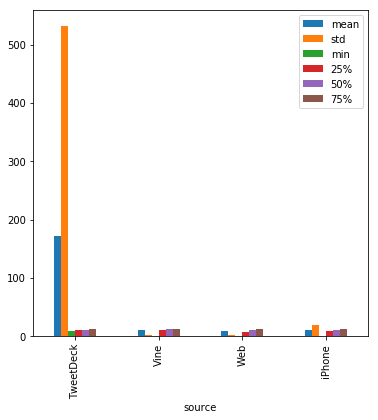

In [82]:
###  This bar chart shows the relationship between the source
###  and rating is that tweets from TweetDeck have the highest
###  rating mean. Vine and Web sources tend to have lower ratings
###  while tweets from iphone are average.
archive_master.groupby('source').describe()['rating_numerator'][['mean','std','min','25%','50%','75%']].plot.bar(figsize=(6,6));

### References

    Reading from Json file: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
    JsonDecoder problem: https://stackoverflow.com/a/48154834
    Helped in cleaning: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition